In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Overlap data

In [4]:
overlapdata=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Multiple CSV\Multiple CSV\6.overlap.csv",header=None)

In [5]:
overlapdata

0    1  2
0   7.0  3.2  0
1   6.4  3.2  0
2   6.9  3.1  0
3   5.5  2.3  0
4   6.5  2.8  0
..  ...  ... ..
95  6.7  3.0  1
96  6.3  2.5  1
97  6.5  3.0  1
98  6.2  3.4  1
99  5.9  3.0  1

[100 rows x 3 columns]

In [7]:
fv=overlapdata.iloc[:,:2]
cv=overlapdata.iloc[:,-1]

In [9]:
std=StandardScaler()
p_fv=std.fit_transform(fv)

In [11]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(p_fv,cv)
plot_decision_regions(X=p_fv,y=cv.astype(int).values,clf=knn)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

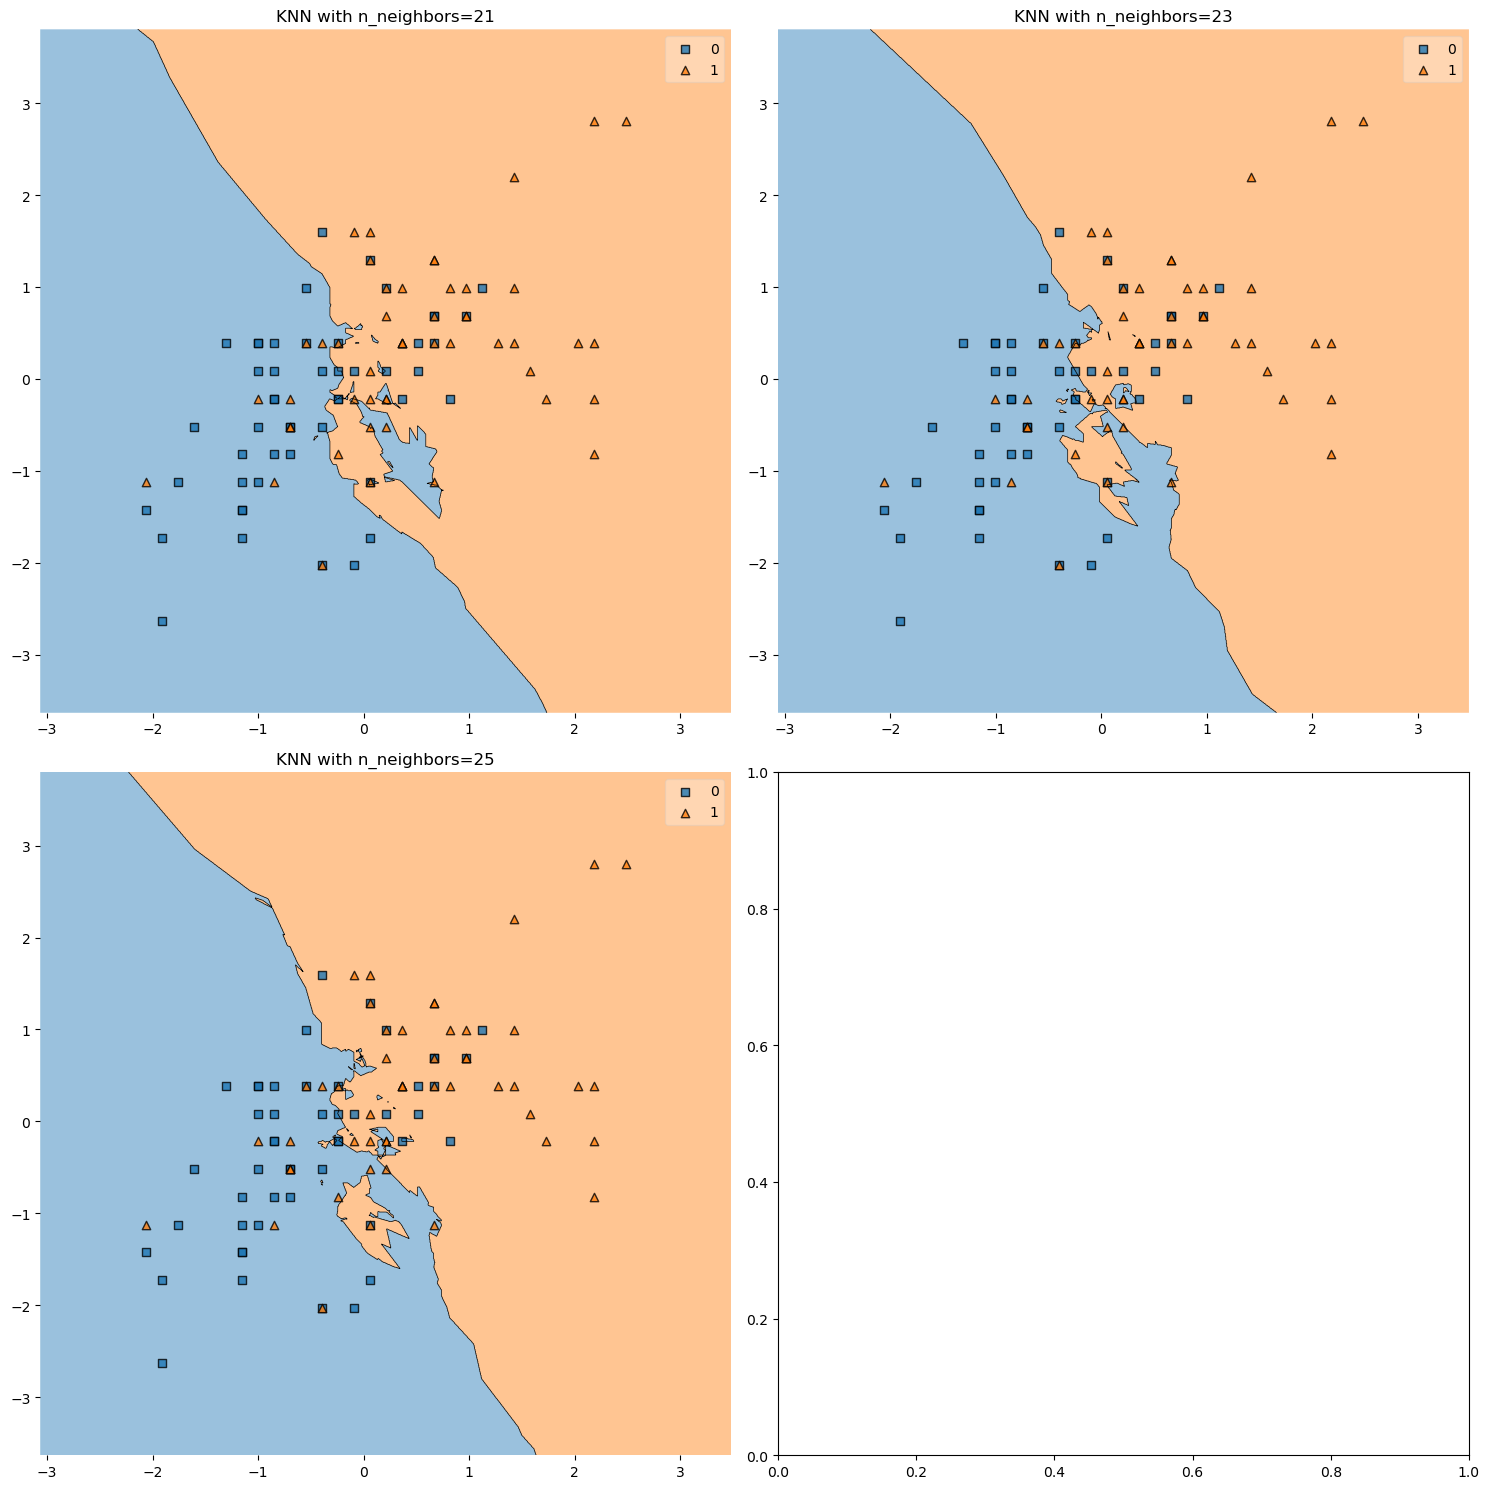

In [25]:

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in zip(range(21, 26, 2), axes.flatten()):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(p_fv, cv.astype(int))
    plot_decision_regions(X=p_fv, y=cv.astype(int).values, clf=knn, ax=ax)
    ax.set_title(f'KNN with n_neighbors={i}')

plt.tight_layout()
plt.show()

## Using Accuracy method

In [15]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [16]:
std=StandardScaler()
px_train=std.fit_transform(x_train)
px_test=std.transform(x_test)

In [17]:
k=[]
acc=[]
err=[]

for i in range(1,80,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(px_train,y_train)
    predicted=model.predict(px_test)
    k.append(i)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [19]:
plt.plot(k,acc)